# Integrantes
* Jorge Ñancupil
* Luis Lagos
* Josue Avila

## Carga del set de datos e importacion de las librerias necesarias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, normalize
from matplotlib.patches import ConnectionPatch

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance as ds
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Carga de archivos

In [2]:
df1 = pd.read_excel('../Base_clientes_Monopoly.xlsx', 'Transición de Negocio', skiprows=[0])

#df1 = pd.read_excel('/content/data/Base_clientes_Monopoly.xlsx', 'Transición de Negocio', skiprows=[0])

## Preparacion de Datos

In [3]:
df = df1.copy()

#Encoder
encoder = LabelEncoder()

df["Sexo_encoded"] = encoder.fit_transform(df["Sexo"])

#Imputacion
imputer = SimpleImputer(strategy="mean")

fields = ["Renta", "Region"]

df[fields] = imputer.fit_transform(df[fields])

#Escalador
scaler = MinMaxScaler()

fields = ["Renta", "Edad", "Subsegmento", "Antiguedad"]

scaled_fields = [field + "_scaled" for field in fields]

df[scaled_fields] = scaler.fit_transform(df[fields])

## Analisis para obtener numero de clusters
En este código se realiza un análisis de clustering utilizando el algoritmo K-means en un conjunto de datos. A continuación, se explica cada paso:

1. Se seleccionan las columnas relevantes del dataframe `df` utilizando el método `loc[]`. Las columnas seleccionadas son "Renta_scaled", "Edad_scaled", "Subsegmento_scaled" y "Antiguedad_scaled". Los datos seleccionados se asignan a la variable `data`.

2. Se crea una lista vacía llamada `sse` para almacenar la suma de cuadrados (SSE) acumulada.

3. Se realiza un bucle `for` que itera desde 1 hasta 10 (exclusivo) para probar diferentes números de clusters.

4. Dentro del bucle, se ajusta el modelo K-means a los datos `data` utilizando `n_clusters=k` y `random_state=42`. El resultado se asigna a la variable `kmeans`.

5. Se calcula la suma de cuadrados acumulada utilizando el atributo `inertia_` del modelo K-means y se agrega a la lista `sse`.

6. Se crea una lista vacía llamada `sil_scores` para almacenar el coeficiente de silueta (silhouette score) para cada número de clusters.

7. Se realiza otro bucle `for` que itera desde 2 hasta 10 (exclusivo) para calcular el coeficiente de silueta.

8. Dentro del bucle, se ajusta nuevamente el modelo K-means a los datos `data` y se calcula el coeficiente de silueta utilizando la función `silhouette_score()`.

9. El coeficiente de silueta se agrega a la lista `sil_scores`.

10. Se visualiza el Elbow method (método del codo) utilizando `plt.plot()` para trazar la suma de cuadrados acumulada (`sse`) en función del número de clusters. Se muestra un gráfico con los valores en el rango de 1 a 10.

11. Se visualiza el coeficiente de silueta utilizando `plt.plot()` para trazar el coeficiente de silueta (`sil_scores`) en función del número de clusters. Se muestra un gráfico con los valores en el rango de 2 a 10.

Estos gráficos permiten evaluar la calidad de los clusters generados por el algoritmo K-means y determinar el número óptimo de clusters utilizando el método del codo y el coeficiente de silueta.





## Arreglar
Para arreglar creen una nueva celda

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

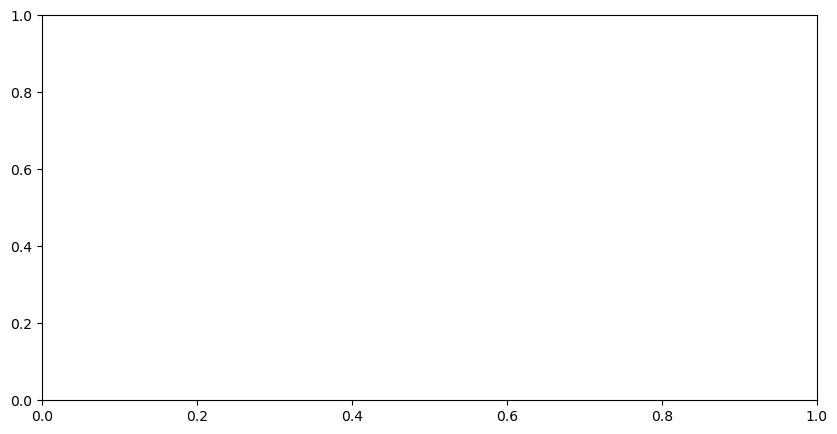

In [24]:
# data = df.loc[:, ["Renta_scaled", "Edad_scaled", "Subsegmento_scaled", "Antiguedad_scaled"]]


# # Visualizar los clusters en un espacio de 2 dimensiones
# pca = PCA(n_components=2).fit(data)
# df_pca = pd.DataFrame(pca.transform(data), columns=['pca_dim1', 'pca_dim2'])

# # Crear una lista para almacenar la suma de cuadrados (SSE) acumulada
# sse = []
# sil_scores = []

# # Calcular la suma de cuadrados acumulada para cada iteración del algoritmo
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42).fit(df_pca)
#     sse.append(kmeans.inertia_)
#     sil_scores.append(silhouette_score(df_pca, kmeans.labels_))

# # Visualizar el Elbow method y el coeficiente de silueta
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, 11), sse, marker='o')
# plt.xlabel('Número de clusters')
# plt.ylabel('SSE')
# plt.title('Elbow method')
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(range(2, 11), sil_scores, marker='o')
# plt.xlabel('Número de clusters')
# plt.ylabel('Coeficiente de silueta')
# plt.title('Coeficiente de silueta')
# plt.show()

En este código se realiza la visualización de los clusters en un espacio de 2 dimensiones y se obtienen los indicadores de clustering utilizando el algoritmo K-means.

1. Se utiliza el análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos a 2 dimensiones. Se ajusta el modelo PCA con `n_components=2` y se aplica a los datos `data`. El resultado se almacena en la variable `df_pca`, que es un dataframe con las coordenadas de los datos transformados en las dimensiones PCA "pca_dim1" y "pca_dim2".

2. Se realiza un bucle `for` que itera desde 2 hasta 9 (exclusivo) para probar diferentes números de clusters.

3. Dentro del bucle, se crea un modelo K-means con `n_clusters=i`, donde `i` es el número actual de clusters en la iteración.

4. Se ajusta el modelo K-means a los datos transformados por PCA (`df_pca`) utilizando el método `fit()`.

5. Se asigna a cada instancia de los datos un cluster utilizando el método `predict()` del modelo K-means. Los resultados se almacenan en la variable `cluster`.

6. Se imprime en pantalla el número de clusters (`i`) y se muestran los indicadores de clustering. En este caso, se muestra la inercia del modelo K-means utilizando el atributo `inertia_` y la silueta utilizando la función `silhouette_score()`.

7. Se repite el bucle para probar diferentes números de clusters y obtener los indicadores correspondientes.

Este código permite visualizar los clusters en un espacio de 2 dimensiones y obtener indicadores de clustering para evaluar la calidad de los clusters generados por el algoritmo K-means.



In [15]:
# Obtenemos los indicadores de clustering:
for i in range(2,10):
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(df_pca)
  cluster = kmeans.predict(df_pca)
  print('cluster con',i,'segmentos')
  print('Inercia: '+str(kmeans.inertia_)) 
  #print('Silueta: '+str(metrics.silhouette_score(X, cluster, metric='euclidean')))
  print('Silueta: '+str(silhouette_score(df_pca, cluster, metric='cosine')))
  print('\n')

cluster con 2 segmentos
Inercia: 273.5069125009238
Silueta: 0.569257634390378


cluster con 3 segmentos
Inercia: 189.3116300810059
Silueta: 0.5622921513898209


cluster con 4 segmentos
Inercia: 142.09116840055395
Silueta: 0.3863112177084442


cluster con 5 segmentos
Inercia: 107.10652433845421
Silueta: 0.4530585670837834


cluster con 6 segmentos
Inercia: 91.4643576968429
Silueta: 0.30590727386441174


cluster con 7 segmentos
Inercia: 80.51752335766191
Silueta: 0.2902087742518723


cluster con 8 segmentos
Inercia: 71.44535990883821
Silueta: 0.22215242357588988


cluster con 9 segmentos
Inercia: 63.11996170508027
Silueta: 0.17637807552637272




## Aplicar K-Means

En este código, se realiza un análisis de clustering utilizando el algoritmo K-means en un conjunto de datos representado por las variables "Renta_scaled", "Edad_scaled", "Subsegmento_scaled" y "Antiguedad_scaled". A continuación, se explica paso a paso lo que se hace en este apartado:

1. Se seleccionan las variables relevantes del dataframe `df` y se almacenan en la variable `data`.

2. Se ajusta el modelo de K-means con 3 clusters utilizando la clase `KMeans` de la biblioteca scikit-learn. El parámetro `random_state` se establece en 42 para asegurar la reproducibilidad de los resultados. El modelo se ajusta a los datos utilizando el método `fit()`.

3. Se asigna cada instancia de los datos a un cluster utilizando el atributo `labels_` del modelo K-means.

4. Se añaden las etiquetas de los clusters al dataframe `df` en una nueva columna llamada "cluster".

5. Se obtienen los centroides de los clusters utilizando el atributo `cluster_centers_` del modelo K-means.

6. Se realiza una reducción de dimensionalidad utilizando el análisis de componentes principales (PCA) con 2 componentes. Se ajusta el modelo PCA a los datos utilizando el método `fit()` y se transforman los datos utilizando el método `transform()`.

7. Se crea un nuevo dataframe `df_pca` con las coordenadas de los datos transformados por PCA y se agrega la columna "cluster" con las etiquetas de los clusters.

8. Se calculan los centroides del modelo K-means en el espacio de las dos dimensiones utilizando el método `transform()` del modelo PCA.

9. Se visualizan los clusters en un espacio de 2 dimensiones utilizando el método `scatter()` de matplotlib. Los puntos de datos se representan en el plano definido por las dimensiones PCA "pca_dim1" y "pca_dim2", y se les asigna un color según su etiqueta de cluster. Los centroides se representan como puntos rojos marcados con "X".

10. Se trazan líneas punteadas de color azul entre los centroides para mostrar las distancias entre ellos. La distancia entre cada par de centroides se calcula utilizando la distancia euclidiana.

11. Se añaden anotaciones con las distancias entre los centroides en el centro de cada línea.

12. Se agregan etiquetas de ejes, título y leyenda a la visualización.

13. Se muestra la visualización utilizando el método `show()` de matplotlib.

Este código permite visualizar los clusters y los centroides en un espacio de 2 dimensiones, así como las distancias entre los centroides. El análisis de clustering y la visualización proporcionan información sobre cómo se agrupan los datos y la separación entre los clusters en el espacio de las variables seleccionadas.





c:\Users\lucas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


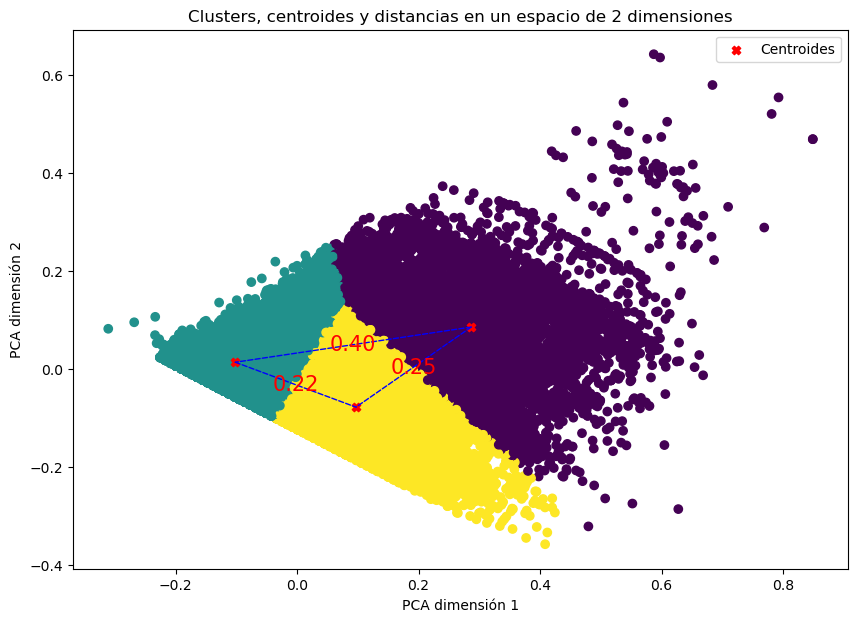

In [23]:
data = df.loc[:, ["Renta_scaled", "Edad_scaled", "Subsegmento_scaled", "Antiguedad_scaled"]]

# Ajustar el modelo de k-means con el número óptimo de clusters (por ejemplo, 4)
kmeans = KMeans(n_clusters=3, random_state=42).fit(data)

# Asignar cada instancia de los datos a un cluster
labels = kmeans.labels_

# Añadir las etiquetas de los clusters al dataframe
df['cluster'] = labels

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Visualizar los clusters en un espacio de 2 dimensiones
pca = PCA(n_components=2).fit(data)
df_pca = pd.DataFrame(pca.transform(data), columns=['pca_dim1', 'pca_dim2'])
df_pca['cluster'] = labels

# Calcular los centroides del modelo de k-means
centroids = kmeans.cluster_centers_

# Convertir los centroides al espacio de las dos dimensiones
centroids_pca = pca.transform(centroids)

# Visualizar los centroides y los clusters en un espacio de 2 dimensiones
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['pca_dim1'], df_pca['pca_dim2'], c=df_pca['cluster'], cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', label='Centroides')
for i in range(len(centroids_pca)):
    for j in range(i+1, len(centroids_pca)):
        distance = ds.euclidean(centroids[i], centroids[j])
        line = ConnectionPatch(centroids_pca[i], centroids_pca[j], 'data', 'data', linestyle='dashed', color='blue')
        plt.gca().add_patch(line)
        plt.annotate(f'{distance:.2f}', ((centroids_pca[i, 0] + centroids_pca[j, 0]) / 2, (centroids_pca[i, 1] + centroids_pca[j, 1]) / 2),
                     color='red', fontsize=15, ha='center', va='center')
plt.xlabel('PCA dimensión 1')
plt.ylabel('PCA dimensión 2')
plt.title('Clusters, centroides y distancias en un espacio de 2 dimensiones')
plt.legend()
plt.show()

## Aplicar metodo jerarquia Clusters (aglomerativo o decisivo)
Aplicar o el método jerarquia de clusters aglomerativo o divisivo, y explicar porque se eligió uno sobre el otro. Deben evaluar ambos casos, y de manera empírica llegar a un resultado concluyente. 0.75 Punto (Markdown 0.25)

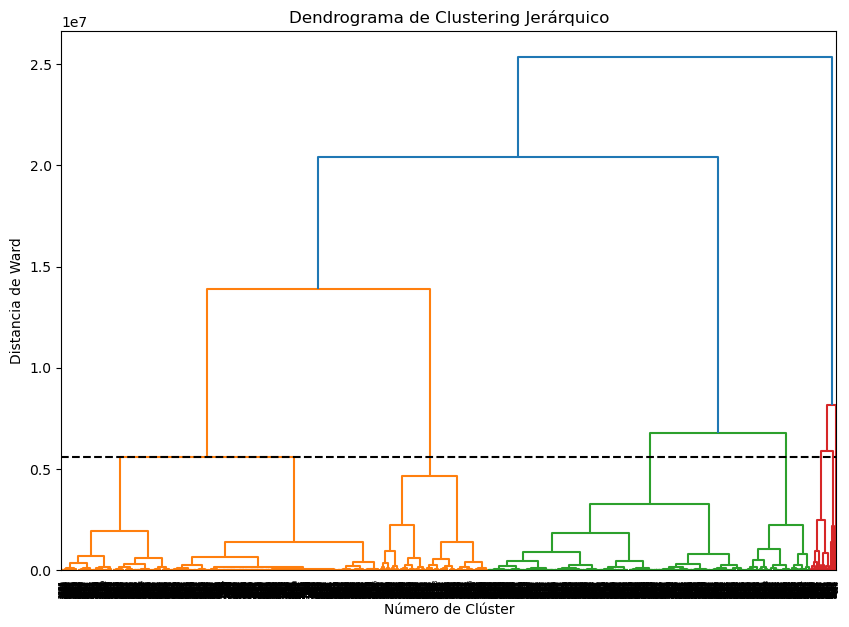

In [21]:
# Seleccionar las variables relevantes
data = df.loc[:5000, ["Renta", "Edad", "Subsegmento"]] # Se utilizo una muestra reducida debido a problemas de memoria y tiempo de ejecucion

# Realizar el clustering jerárquico
linked = linkage(data, 'ward')

# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top',
           labels=data.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y=linked[-7, 2], color='black', linestyle='--')  # Línea negra para resaltar la unión de 7 clusters
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Número de Clúster")
plt.ylabel("Distancia de Ward")
plt.show()

Se juntos en grupo los individuos, creando así una similitud entre ellos, el cluster de "edad, renta y subsegmento" se van agrupando en base a la distancia que existan sobre ellos, detectando a los individuos que puedan ser considerados como similares y los asigna a un mismo cluster, dejando a los individuos disimilares en clusters distintos. Mostrándonos que hay más individuos similares en grupos hacia el lado derecho

In [20]:
# Ajustando Clustering Jerárquico al conjunto de datos

jerarquico = AgglomerativeClustering(n_clusters = 7,
                    affinity = 'euclidean', 
                    linkage = 'ward')

clust_j = jerarquico.fit_predict(data)

print('Silueta: '+str(silhouette_score(data, clust_j, metric='cosine')))

Silueta: 0.3253116297749528


## DBSCAN
GitHub Copilot: Este código realiza el proceso de selección del parámetro epsilon (eps) para el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) y aplica DBSCAN a un conjunto de datos.

Aquí está el paso a paso de lo que hace el código:

1. `data = df.loc[:5000, ["Renta_scaled", "Edad_scaled"]]`: Selecciona una porción de los datos del dataframe `df` que contiene las columnas "Renta_scaled" y "Edad_scaled". En este caso, se seleccionan las primeras 5000 filas.

2. `k = 7`: Define el valor de `k`, que representa el número mínimo de muestras (min_samples) para considerar un punto como Core Point en DBSCAN.

3. `nearest_neighbors = NearestNeighbors(n_neighbors=k)`: Crea una instancia de la clase `NearestNeighbors` con `k` vecinos más cercanos.

4. `neighbors = nearest_neighbors.fit(data)`: Ajusta el modelo de vecinos más cercanos utilizando los datos `data`.

5. `distances, indices = neighbors.kneighbors(data)`: Calcula las distancias y los índices de los `k` vecinos más cercanos para cada punto en `data`.

6. `distances = np.sort(distances[:, k-1], axis=0)`: Ordena las distancias al `k`-ésimo vecino más cercano en orden ascendente.

7. `plt.plot(distances)`: Grafica las distancias en función de los puntos ordenados.

8. `plt.xlabel('Puntos ordenados')`: Establece la etiqueta del eje x como "Puntos ordenados".

9. `plt.ylabel('Distancia al {}-ésimo vecino más cercano'.format(k))`: Establece la etiqueta del eje y como "Distancia al k-ésimo vecino más cercano".

10. `plt.title('Gráfico para la selección del parámetro eps de DBSCAN')`: Establece el título del gráfico.

11. `plt.show()`: Muestra el gráfico.

12. `index_of_inflexion = np.argmax(np.diff(distances))`: Encuentra el punto de inflexión en el gráfico de distancias utilizando la función `argmax` y `diff` de NumPy.

13. `eps_value = distances[index_of_inflexion]`: Obtiene el valor de epsilon (eps) correspondiente al punto de inflexión.

14. `print("Valor de epsilon:", eps_value)`: Imprime el valor de epsilon.

15. `dbscan = DBSCAN(eps=eps_value)`: Crea una instancia de la clase `DBSCAN` con el valor de epsilon obtenido.

16. `labels = dbscan.fit_predict(data)`: Aplica DBSCAN a los datos `data` y asigna las etiquetas de clustering a cada punto.

17. `plt.scatter(data["Renta_scaled"], data["Edad_scaled"], c=labels)`: Grafica los puntos de `data` en un gráfico de dispersión, utilizando las columnas "Renta_scaled" y "Edad_scaled" como coordenadas x e y, respectivamente. Los puntos se colorean según las etiquetas de clustering.

18. `plt.xlabel('Renta_scaled')`: Establece la etiqueta del eje x como "Renta_scaled".

19. `plt.ylabel('Edad_scaled')`: Establece la etiqueta del eje y como "Edad_scaled".

20. `plt.title(f'Clustering con DBSCAN (epsilon = {eps_value})')`: Establece el título del gráfico.

21. `plt.show()`: Muestra el gráfico resultante.

Este código realiza la selección automática del valor de epsilon y aplica DBSCAN para realizar el clustering de los datos en función de las columnas "Renta_scaled" y "Edad_scaled".



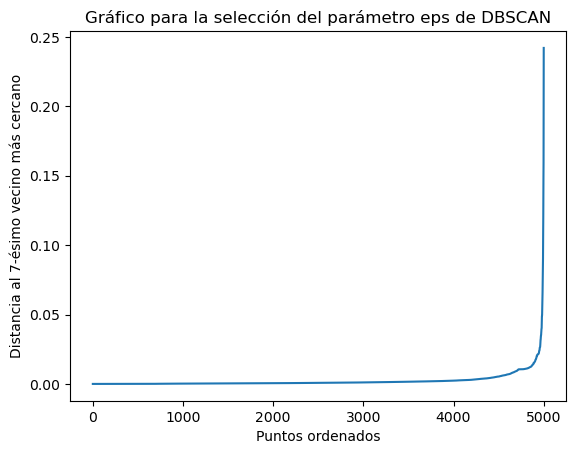

Valor de epsilon: 0.19007314781261453


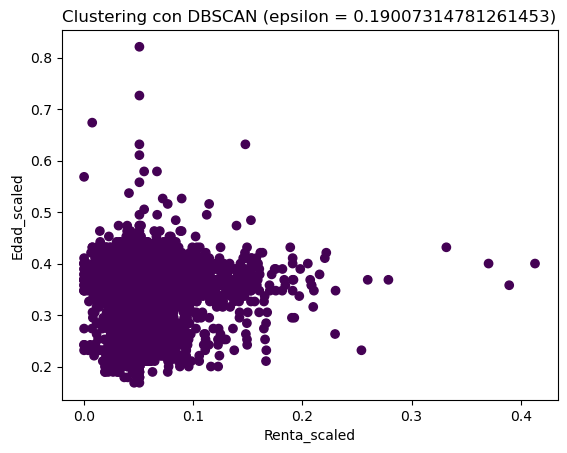

In [40]:
# Obtener tus datos
data = df.loc[:5000, ["Renta_scaled", "Edad_scaled"]]

# Definir el valor de k (min_samples para DBSCAN)
k = 7

# Calcular las distancias al k-ésimo vecino más cercano
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data)
distances, indices = neighbors.kneighbors(data)

# Ordenar las distancias y trazar el gráfico
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al {}-ésimo vecino más cercano'.format(k))
plt.title('Gráfico para la selección del parámetro eps de DBSCAN')
plt.show()

# Encontrar el punto de inflexión en el gráfico
index_of_inflexion = np.argmax(np.diff(distances))
eps_value = distances[index_of_inflexion]

print("Valor de epsilon:", eps_value)

# Crear una instancia de DBSCAN con el valor de epsilon
dbscan = DBSCAN(eps=eps_value)

# Aplicar DBSCAN a tus datos
labels = dbscan.fit_predict(data)

# Graficar los puntos y colorearlos según las etiquetas de clustering
plt.scatter(data["Renta_scaled"], data["Edad_scaled"], c=labels)
plt.xlabel('Renta_scaled')
plt.ylabel('Edad_scaled')
plt.title(f'Clustering con DBSCAN (epsilon = {eps_value})')
plt.show()

## Categorias
Una vez seleccionados, deberán usar una o mas de las categorías Core Point, Border Point y Noise u Outlier, indicando de manera gráfica cuales se encuentran en estas categorías de manera explicita 1.75 Puntos (Markdown 0.25)

## Arreglar
Para arreglar creen una nueva celda

In [42]:
# # Obtener los índices de los puntos en cada categoría
# core_samples_mask = np.zeros_like(labels, dtype=bool)
# core_samples_mask[dbscan.core_sample_indices_] = True
# border_samples_mask = (labels == -1) & ~core_samples_mask
# noise_samples_mask = (labels == -1) & ~border_samples_mask

# # Graficar los puntos y las categorías
# plt.scatter(data[core_samples_mask, 0], data[core_samples_mask, 1], c='red', label='Core Point')
# plt.scatter(data[border_samples_mask, 0], data[border_samples_mask, 1], c='blue', label='Border Point')
# plt.scatter(data[noise_samples_mask, 0], data[noise_samples_mask, 1], c='green', label='Noise/Outlier')
# plt.legend()
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Categorías de puntos')
# plt.show()

InvalidIndexError: (array([ True,  True,  True, ...,  True,  True,  True]), 0)